In [48]:
import pandas as pd
import numpy as np

In [49]:
raw_data = pd.read_csv("sea_managing_raw.csv", encoding = "cp949")
val_data = pd.read_csv("sea_managing_val.csv", encoding = "cp949")
print(raw_data.columns)
print(raw_data.shape)
raw_data.head()

Index(['국가코드', 'DB종류', '특허/실용 구분', '문헌종류 코드', '발명의 명칭', '요약', '대표청구항', '청구항 수',
       '출원번호', '출원일', '공개번호/공표/재공표 ', '공개일', '등록번호', '등록일', '출원인', '출원인 국적',
       '출원인 수', '출원인 대표명화 코드', '출원인 대표명화 영문명', '출원인 대표명화 국문명[KR]',
       '출원인 식별기호[JP]', '발명자/고안자', '우선권 번호', '우선권 국가', '우선권 주장일', '국제 공개번호',
       '국제 공개일', 'Original CPC Main', 'Original CPC All', 'Original IPC Main',
       'Original IPC All', 'Original US Class Main[US]',
       'Original US Class All[US]', 'Original FI[JP]', 'Original F-term[JP]',
       'Original Theme Code [JP]', 'WIPS ON key'],
      dtype='object')
(1905, 37)


,국가코드,DB종류,특허/실용 구분,문헌종류 코드,발명의 명칭,요약,대표청구항,청구항 수,출원번호,출원일,...,Original CPC Main,Original CPC All,Original IPC Main,Original IPC All,Original US Class Main[US],Original US Class All[US],Original FI[JP],Original F-term[JP],Original Theme Code [JP],WIPS ON key
0,US,US,P,B2,Turboengine water wash system,A system for cleaning gas turbine engines is d...,1. An apparatus for cleaning wing mounted gas ...,64,11/644784,2006-12-22,...,NaN,NaN,B08B-009/00,B08B-009/00,134/166.R,134/166.R | 134/138,NaN,NaN,NaN,4.914000e+12
1,US,US,P,A1,TREATMENT OF TAILINGS WITH DEIONIZED SILICATE ...,A process for treating a tailings stream compr...,1. A process for treating a tailings stream co...,20,13/848244,2013-03-21,...,B09B-0003/0025,B09B-0003/0025,B09B-003/00,B09B-003/00,106/627,106/627 | 106/600 | 106/631 | 106/632 | 106/63...,NaN,NaN,NaN,5.414000e+12
2,US,US,P,A1,Method And Apparatus For Treating Tailings Usi...,There is a method described of treating tailin...,1. A method of treating tailings having a comb...,18,13/765924,2013-02-13,...,C02F-0001/48,C02F-0001/48,C02F-001/48,C02F-001/48,204/554,204/554,NaN,NaN,NaN,5.414000e+12
3,US,US,P,A1,METHOD FOR STABILIZING WASTE AND HAZARDOUS WASTE,The invention provides a process for stabilizi...,"1. A method for stabilizing hazardous waste, c...",20,13/767408,2013-02-14,...,A62D-0003/33,A62D-0003/33 | G21F-0009/302,A62D-003/33,A62D-003/33 | G21F-009/30,588/002,588/002 | 588/315,NaN,NaN,NaN,5.414000e+12
4,US,US,P,B2,Water treatment process and plant using ballas...,A method for treating wastewater using a balla...,1. A method of treating wastewater including: ...,18,12/521154,2007-12-26,...,NaN,NaN,C02F-001/52,C02F-001/52 | B01D-021/01 | B01D-021/02 | B01D...,210/709,210/709 | 210/711 | 210/712 | 210/713 | 210/71...,NaN,NaN,NaN,4.913050e+12


In [50]:
print(val_data.shape)
val_data.head()

(2098, 7)


,공개(등록)번호,공개(등록)일자,국가,구분,발명의 명칭,IPC,출원인
0,1014013000000,20140523,KR,등록,생태안착형 입체 호안구조 및 이의 시공방법,E02B,벽산건설 주식회사
1,1014013000000,20140523,KR,등록,생태안착형 입체 호안구조 및 이의 시공방법,E02B,벽산건설 주식회사
2,1013950840000,20140508,KR,등록,질소 및 인의 동시 제거가 가능한 생물여과 처리장치,C02F,주식회사 지승개발
3,1013950840000,20140508,KR,등록,질소 및 인의 동시 제거가 가능한 생물여과 처리장치,C02F,주식회사 지승개발
4,1013903570000,20140423,KR,등록,살수여상기능 및 정수처리기능을 갖는 자연형 하천 호안 공법,E02B,충북대학교 산학협력단


In [51]:
#데이터 없는 columnn drop
#ex) 'Original FI[JP]', 'Original F-term[JP]', 'Original Theme Code [JP]'
for i in raw_data.columns:
    if raw_data[i].count() == 0:
        raw_data = raw_data.drop([i], axis =1)
raw_data.count()

국가코드                          1905
DB종류                          1905
특허/실용 구분                      1905
문헌종류 코드                       1905
발명의 명칭                        1905
요약                            1905
대표청구항                         1905
청구항 수                         1905
출원번호                          1905
출원일                           1905
공개번호/공표/재공표                   1685
공개일                           1685
등록번호                           541
등록일                            541
출원인                            888
출원인 국적                         779
출원인 수                         1905
출원인 대표명화 코드                    354
출원인 대표명화 영문명                   354
발명자/고안자                       1905
우선권 번호                         429
우선권 국가                         429
우선권 주장일                        429
국제 공개번호                         71
국제 공개일                          71
Original CPC Main               72
Original CPC All                72
Original IPC Main             1905
Original IPC All    

In [52]:
raw_data.shape

(1905, 32)

<h3>raw data와 유효특허데이터 개수 확인</h3>

In [53]:
raw_list =[]
for i in raw_data["발명의 명칭"]:
    raw_list.append(i.lower())

In [54]:
#유효특허 set 중에서 국가가 'US' 인 것만 뽑아서 '발명의 명칭' 전처리
val_list = []
for i in range(len(val_data)):
    if val_data.iloc[i]['국가'] == 'US':
        val_list.append(val_data.iloc[i]["발명의 명칭"].lower())

In [55]:
#raw_data 중에서 val_data
count = 0
filterd_list = []
for raw in raw_list:
    for val in val_list:
        if raw == val:
            filterd_list.append(raw)
            count += 1
print("유효특허 in raw_data: ", count, ", 중복제거: ",len(set(filterd_list)))

유효특허 in raw_data:  86 , 중복제거:  21


<h4>US 유효특허 : 86개<br></h4>
유효특허 개수만큼 뽑힘<br>

<hr>

<h3>IPC Digitization</h3>

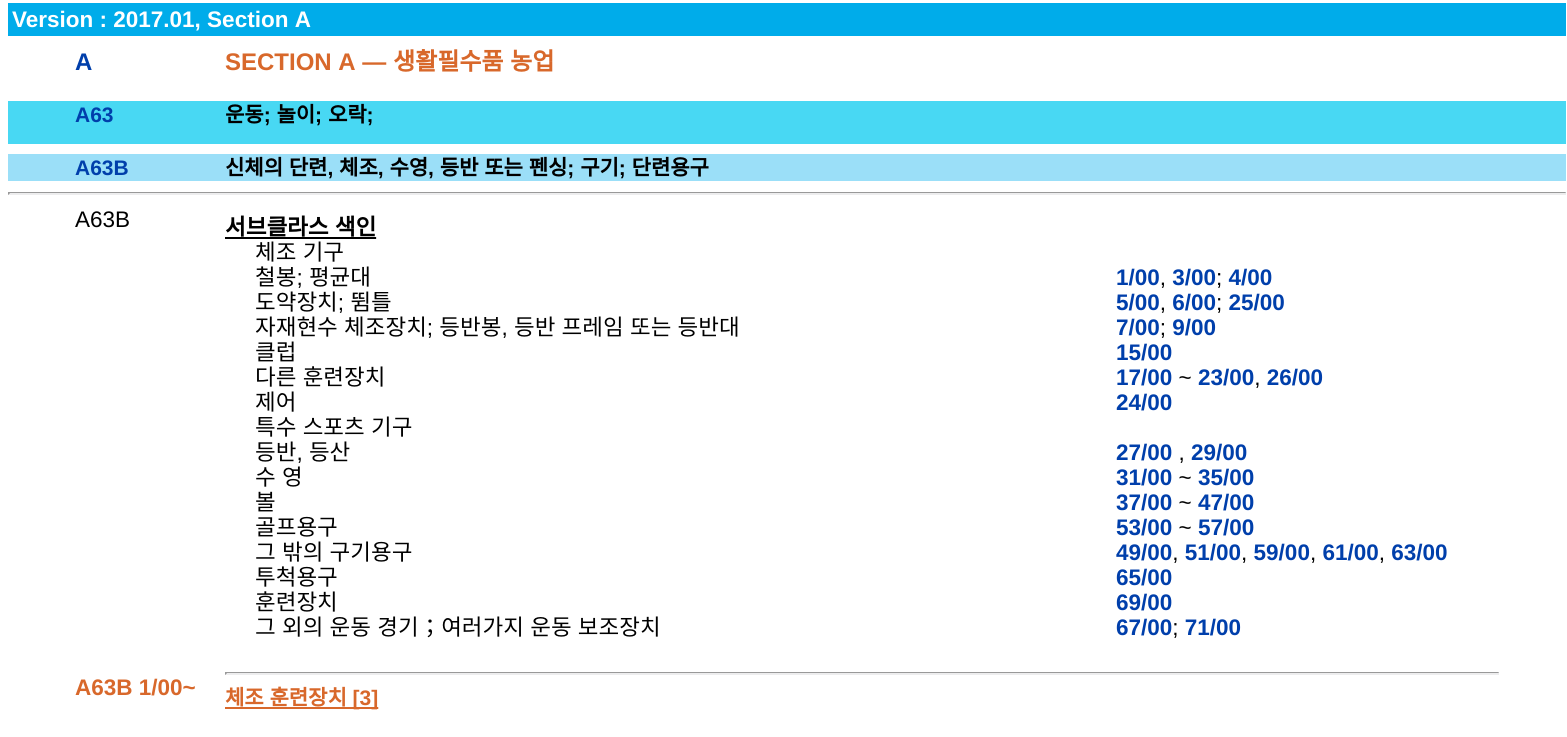

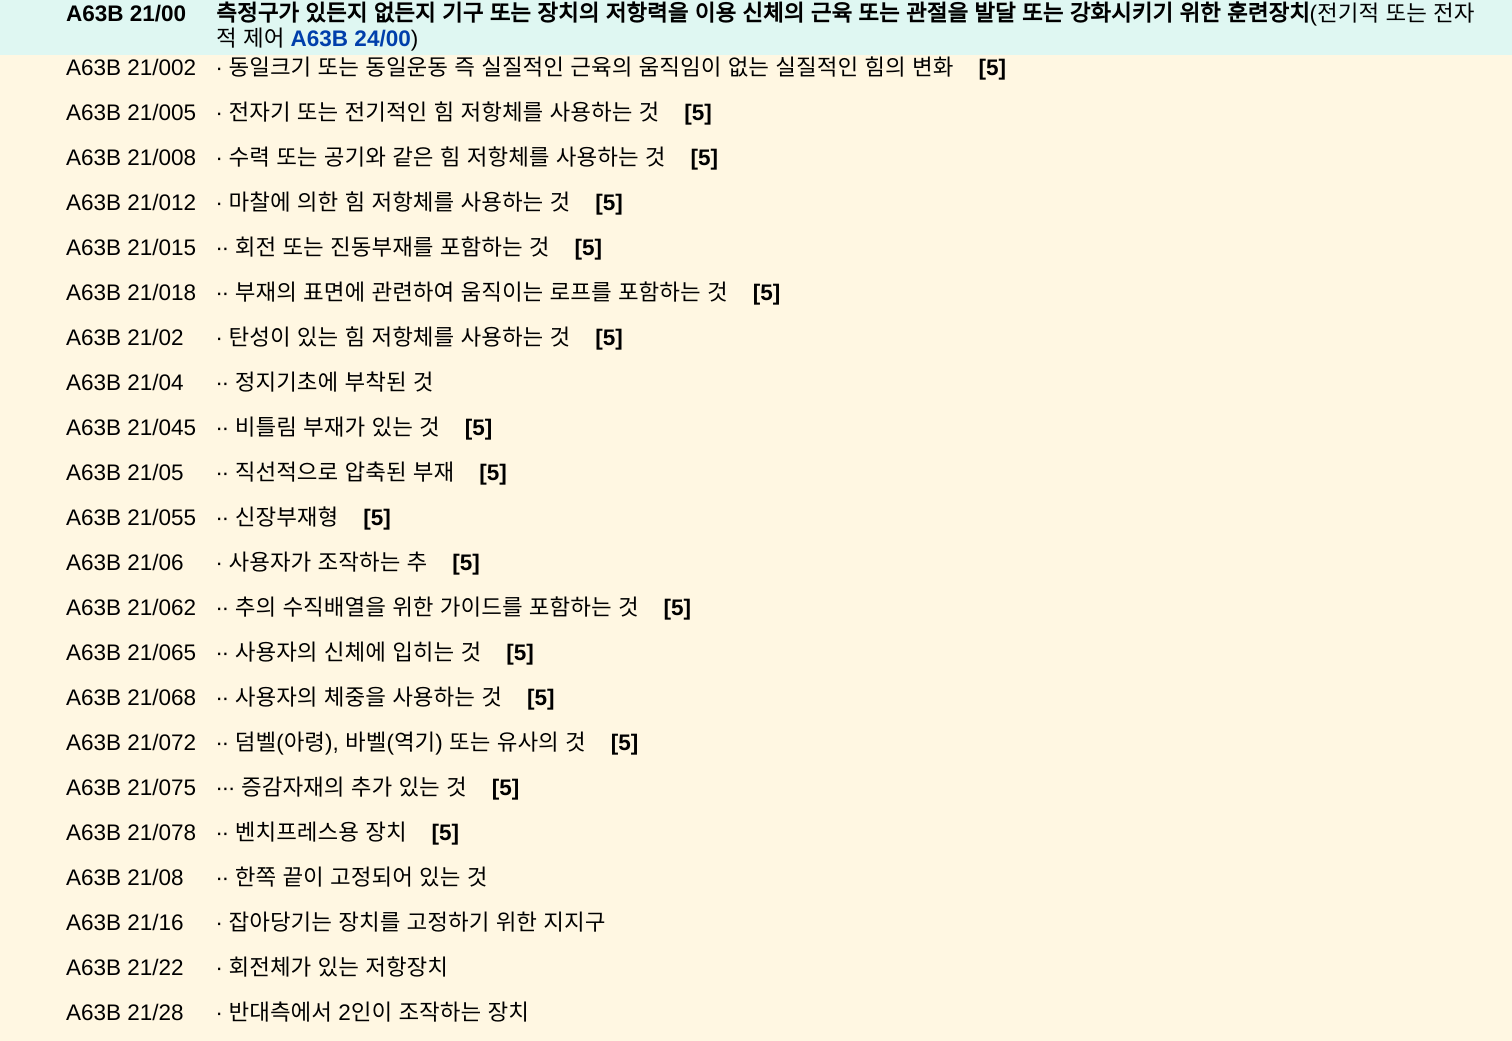

In [56]:
ipc_section = {'A':'1', 'B':'2', 'C':'3', 'D':'4', 'E':'5', 'F':'6', 'G':'7', 'H':'8'}
ipc_sub_section = {'A':'01', 'B':'02', 'C':'03', 'D':'04', 'E':'05', 'F':'06', 'G':'07', 'H':'08',
                   'I':'09', 'J':'10', 'K':'11', 'L':'12', 'M':'13', 'N':'14', 'O':'15', 'P':'16', 'Q':'17',
                   'R':'18', 'S':'19', 'T':'20', 'U':'21', 'V':'22', 'W':'23', 'X':'24', 'Y':'25', 'Z':'26'}

In [57]:
def convert_letter_to_digit(ipc):
    numeric_list = []
    for idx, char in enumerate(ipc):
        if idx == 0 and char in ipc_section:
            char = ipc_section[char]
            numeric_list.append(char)
        elif idx == 3 and char in ipc_sub_section:
            char = ipc_sub_section[char]
            numeric_list.append(char)
        else:
            numeric_list.append(char)
    return numeric_list

In [58]:
def ipc_main_digitization(column):
    for row, ipc in enumerate(column):
        ipc_list = []
        numeric_list = convert_letter_to_digit(ipc)
        ipc_list.append(('').join(numeric_list))
        column[row] = ipc_list

In [62]:
def ipc_all_digitization(column):
    for row, ipc in enumerate(column):
        ipc_list = []
        if "|" in ipc:
            split_ipc = ipc.split("|")
            for ipc in split_ipc:
                ipc = ipc.strip()
                numeric_list = convert_letter_to_digit(ipc)
                ipc = (("").join(numeric_list))
                ipc_list.append(ipc)
            column[row] = ipc_list
        else:
            numeric_list = convert_letter_to_digit(ipc)
            ipc_list.append(('').join(numeric_list))
            column[row] = ipc_list

In [63]:
raw_data['Original IPC All'].head()

0                                          B08B-009/00
1                                          B09B-003/00
2                                          C02F-001/48
3                            A62D-003/33 | G21F-009/30
4    C02F-001/52 | B01D-021/01 | B01D-021/02 | B01D...
Name: Original IPC All, dtype: object

<hr>

In [64]:
#raw_data ipc_main digitization
ipc_main_digitization(raw_data['Original IPC Main'])
raw_data['Original IPC Main'].head()

/home/yehoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    [20802-009/00]
1    [20902-003/00]
2    [30206-001/48]
3    [16204-003/33]
4    [30206-001/52]
Name: Original IPC Main, dtype: object

In [65]:
#val_data ipc digitization
ipc_main_digitization(val_data['IPC'])
val_data['IPC'].head()

/home/yehoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    [50202]
1    [50202]
2    [30206]
3    [30206]
4    [50202]
Name: IPC, dtype: object

In [66]:
#raw_data ipc_all digitization
ipc_all_digitization(raw_data['Original IPC All'])
raw_data['Original IPC All'].head()

/home/yehoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/yehoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


0                                       [20802-009/00]
1                                       [20902-003/00]
2                                       [30206-001/48]
3                         [16204-003/33, 72106-009/30]
4    [30206-001/52, 20104-021/01, 20104-021/02, 201...
Name: Original IPC All, dtype: object